# 1.Setup do projeto

### Kmeans

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans 

# 2. Carregando dados

In [2]:
heart_disease = pd.read_csv('data/raw/processed_hungarian.data', header=None, names=['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [4]:
heart_disease.replace('?', 0, inplace=True)

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0,0
2,29,1,2,140,0,0,0,170,0,0.0,0,0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,0,0,0,0


In [6]:
heart_disease.shape

(294, 14)

# 3. Preparação de dados

In [7]:
heart_disease_nao_rotulado = heart_disease.iloc[:, :-1]
heart_disease_nao_rotulado.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0
2,29,1,2,140,0,0,0,170,0,0.0,0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0,6
4,31,0,2,100,219,0,1,150,0,0.0,0,0,0


# 4. Agrupamento

In [30]:
model = KMeans(n_clusters=5)
model.fit(heart_disease_nao_rotulado)
grupos = model.predict(heart_disease_nao_rotulado)

In [31]:
print(grupos)

[4 0 1 0 4 4 4 0 0 4 4 4 4 4 0 0 4 3 4 4 0 4 4 0 4 4 3 0 0 0 4 1 4 4 1 0 3
 4 0 3 0 0 4 0 1 0 4 0 0 0 0 0 4 4 4 0 4 4 3 4 4 4 0 0 4 1 4 4 4 4 3 0 1 0
 4 1 4 4 0 0 4 4 0 0 0 0 1 0 0 0 3 1 0 4 4 0 4 1 0 0 4 1 1 4 4 0 4 0 1 4 3
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 0 4 0 1 4 0 2 4 0 1 3 4 0 4 0 4 4 0 0 3 4 3 4
 4 0 0 4 0 4 1 3 3 3 3 0 4 3 0 4 0 4 4 4 1 0 1 3 3 0 4 0 4 4 4 0 3 4 1 0 0
 0 4 0 0 0 4 0 0 4 4 0 4 2 0 0 0 4 4 0 4 4 0 0 0 4 0 4 0 0 0 4 4 4 4 0 4 3
 0 4 3 2 1 0 3 0 4 4 4 0 4 3 3 0 4 1 0 0 0 2 1 4 0 4 0 4 0 4 4 0 0 0 0 4 3
 0 4 3 0 3 0 2 0 4 0 0 0 0 4 3 4 1 0 0 1 3 0 2 4 0 4 4 4 3 0 3 0 3 3 0]


# 5. Visualização

In [32]:
# sugestão: TSNE
xs = heart_disease.iloc[:, 0]
ys = heart_disease.iloc[:, 13]

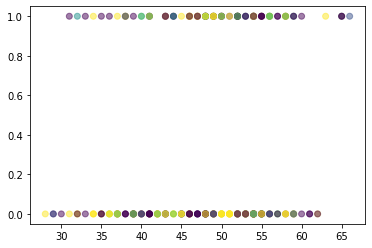

In [34]:
_=plt.scatter(xs, ys, c=grupos, alpha=.5)


### Agrupamento Hierarquico

In [117]:
from sklearn.preprocessing import normalize
index = list(heart_disease.index)
heart_disease_norm = normalize(heart_disease)

In [115]:
mesclagens = linkage(heart_disease_norm, method='complete')

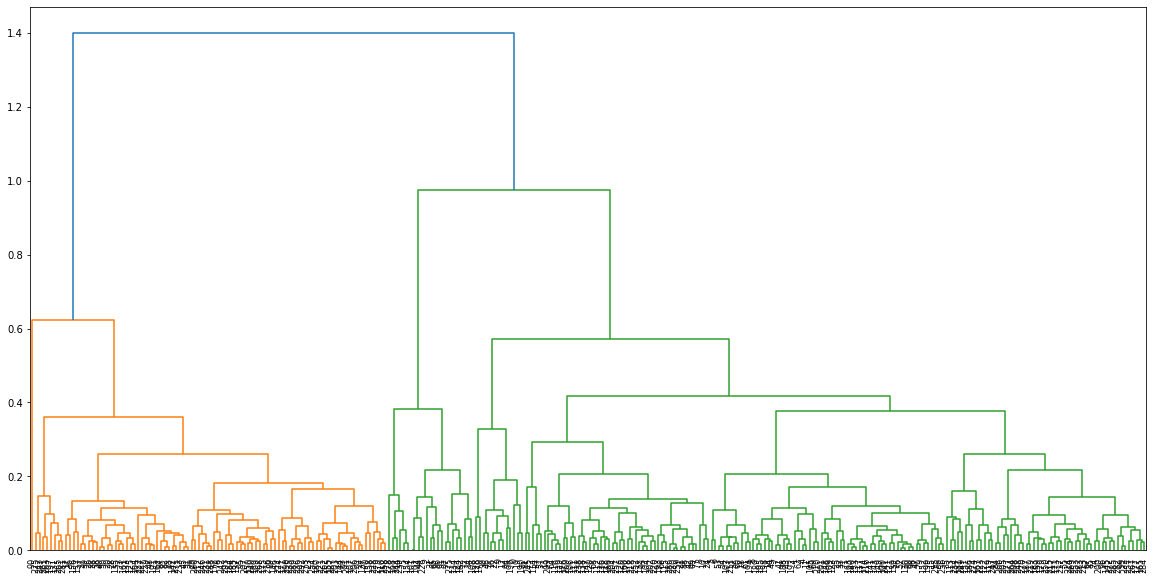

In [119]:
plt.figure(figsize=(20,10))
_=dendrogram(mesclagens, labels=index, leaf_font_size=8)

### DBSCAN - NÃO Finalizado. Luiz eu não consegui chegar em um resultado no DBSCAN.Tentei seguir exemplo abaixo mas creio que não entendi muito bem

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


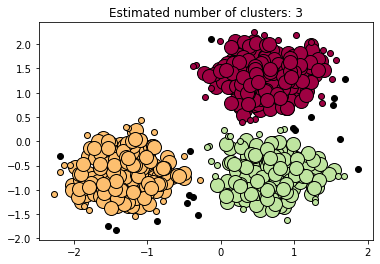

In [29]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
